In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(7)

Using TensorFlow backend.


In [2]:
T = 1000000
X = np.array(range(T))
X = np.arange(-1,1,0.0001)
Y = 0.5 * np.sin(10*np.pi*X) + 0.25 * np.sin(20*np.pi*X) - 0.125 * np.sin(15*np.pi*X)

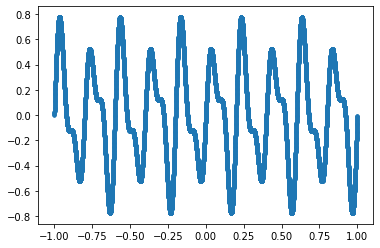

In [3]:
plt.scatter(X, Y, s = 10)
plt.show()

In [4]:
model = Sequential()
model.add(Dense(15, input_dim = 1, activation = 'sigmoid'))
model.add(Dense(45, activation = 'sigmoid'))
model.add(Dense(1, activation = 'tanh'))

model.compile(loss = 'mean_squared_error',optimizer = 'adam')

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
earlyStop = keras.callbacks.EarlyStopping(monitor = 'loss', patience = 100, verbose = 1, mode = 'min')
history = model.fit(X, Y, epochs = 10000, validation_split = 0.25,
                    verbose = 0, callbacks = [earlyStop])

Instructions for updating:
Use tf.cast instead.
Epoch 04262: early stopping


In [6]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,loss,epoch
4257,0.207157,0.005718,4257
4258,0.198449,0.005691,4258
4259,0.202357,0.005678,4259
4260,0.204862,0.005713,4260
4261,0.191704,0.005723,4261


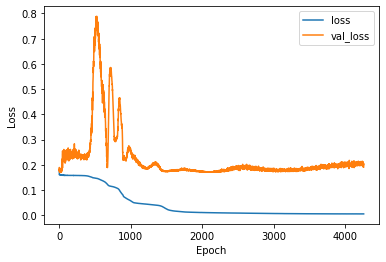

In [9]:
def plotHistory(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
  
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],
             label='loss')
    plt.plot(hist['epoch'], hist['val_loss'],
             label = 'val_loss')
    #plt.ylim([0,5])
    plt.legend()
    plt.show()

plotHistory(history)

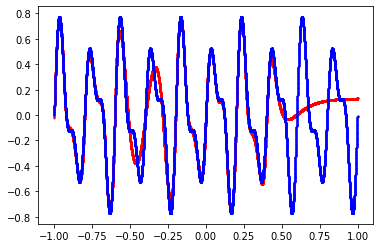

In [8]:
prediction = model.predict(X)
x_plot = X
plt.scatter(x_plot, prediction, s = 1, c = 'r')
plt.scatter(x_plot, Y, s = 1, c = 'b')
plt.show()